# 《合成孔径雷达成像——算法与实现》中3.3.3 频域匹配滤波器

## 3.3.3 频域匹配滤波器

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [23]:
t0 = 1e-6;
TBP = 100 #时间带宽积
T = 7.2e-6;               # % 信号持续时间
B = TBP/T;                 # % 信号带宽
K = B/T;                   # % 调频率
ratio = 1.25;                # % 过采样率
F = ratio*B;              # % 采样频率
dt = 1/F;                 # % 采样间隔
N = int(2*np.ceil(F*T/2))
dt = T/N
df = F/N


t = np.arange(t0-T/2,t0+T/2,dt);     # 时间变量
f = np.arange(-F/2,F/2,df)

st = np.exp( 1j*np.pi*K*(t)**2 )  #信号复数表达式
srt = np.exp( 1j*np.pi*K*(t-t0)**2 ) #信号时延表达式

Srf = fft(srt)  #信号频谱表达式

Hf = np.exp(1j*np.pi*f**2/K)  #频域匹配滤波器
Sout= Srf*Hf



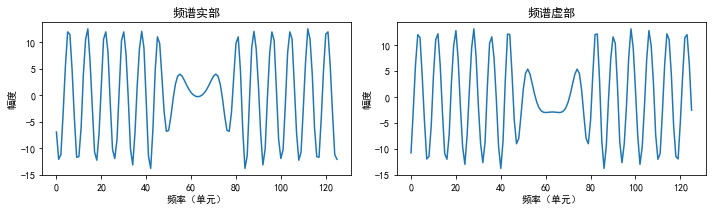

In [24]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(np.real(Sout))
plt.title('频谱实部');plt.xlabel('频率（单元）');plt.ylabel('幅度');
plt.subplot(3,2,2)
plt.plot(np.imag(Sout))
plt.title('频谱虚部');plt.xlabel('频率（单元）');plt.ylabel('幅度');


fig.tight_layout()

